This notebook is to create a dataset to be used to train a model for predicting images.  The dataset is a csv containing quotes that are read in then transformed and output to train.

Each image is assigned to an image.

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import csv
import string
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
df = pd.read_csv('imagequotes.csv')
text = 'As human beings our greatness lies not so much in being able to remake the world - that is the myth of the atomic age - as in being able to remake ourselves.'

In [4]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'
model = hub.load(module_url)

In [5]:
df['Vector'] = model(df['Quote'])

In [6]:
dataset = pd.DataFrame(df['Vector'].tolist(), index=df.index)

In [7]:
X = dataset
y = df['Image']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
quote = model([text])

In [14]:
knn_predictions = knn_classifier.predict(quote)

In [27]:
knn_predictions[0]

12

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
y_pred_test = knn_classifier.predict(X_test)

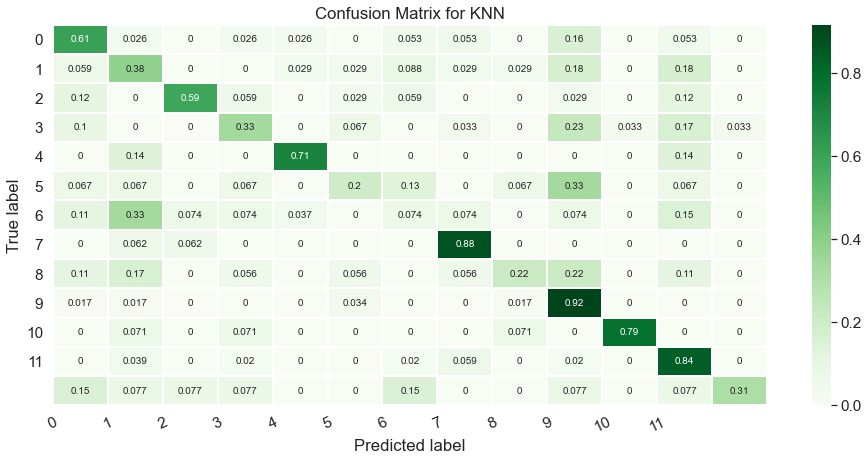

In [26]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = range(12)
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()